# Book
https://wikidocs.net/book/2788

```
torch --- tensor, like numpy
   |
   | ---- torch.autograd : Function, enable_grad/no_grad
   |
   | ---- torch.nn : Module, Loss functions
   |
   | ---- torch.optim : Optimization alogs centered on SGD
   |
   | ---- torch.utils.data : DataLoader, Dataset, minibatch utils
   |
   | ---- torch.onnx : ONNX(Open Neural Network Exchange) format
```

# Tensor
```
torch.tensor(arr, dtype)
torch.from_numpy(ndarray)
```
- Similar to Ndarray
- dType MUST be same

In [82]:
import torch
import numpy

x = torch.arange(10, dtype=torch.uint8).resize(2, 5) # shape [2, 5]
y = torch.eye(5, dtype=torch.uint8) # shape [5, 5]
z = torch.zeros(2, 5, dtype=torch.uint8) # shape

x @ y # x.matmul(y)
x * z # x.mul(y)

x = x.to(torch.float16)
x.mean(dim=-1)


# tensor.view == ndarray.reshape
x = x.view(5, 2)
x = x.view(-1, 5) # -1 is determined automatically
# tensor.shape == tensor.size()
assert x.shape == x.size()
assert x.shape[0] == x.size(0)

# Squeeze & Unsqueeze
t = torch.randn(1, 10, 1, 3, 1)
assert t.squeeze().shape == torch.Size([10, 3]) # Remove 1-dim

t = torch.randn(10)
assert t.unsqueeze(1).shape == torch.Size([10, 1]) # Add 1-dim
assert t.unsqueeze(0).shape == torch.Size([1, 10])

# Concat & Stacking
x = torch.ones(1, 2, 3)
y = torch.ones(1, 2, 3)
# Extend dim
# Other dimensions MUST be same
assert torch.cat([x,y]).shape == torch.Size([2, 2, 3]) 
assert torch.cat([x,y], dim=1).shape == torch.Size([1, 4, 3])

# Stack at dim
# All dim must be same
assert torch.stack([x, y], dim = 0).shape == torch.Size([2, 1, 2, 3])
assert torch.stack([x, y], dim = 1).shape == torch.Size([1, 2, 2, 3])
assert torch.stack([x, y], dim = 2).shape == torch.Size([1, 2, 2, 3])
assert torch.stack([x, y], dim = 3).shape == torch.Size([1, 2, 3, 2])

# in-place operator has _ postfix
x = torch.ones(1)
x.mul_(2)
assert x == torch.ones(1) * 2

## Linear Regression
- To train & eval, dataset and model MUST be in same device
- To pass data, data & parameters MUST be same dtype

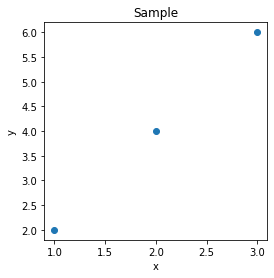

In [107]:
import torch
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([1,2,3]).unsqueeze(1) # batchsize, x
y_train = torch.FloatTensor([2,4,6]).unsqueeze(1) # batchsize, y

x_valid = torch.FloatTensor([7,8,9]).unsqueeze(1)
y_valid = torch.FloatTensor([14,16,18]).unsqueeze(1)

x_test = torch.FloatTensor([4,5,6]).unsqueeze(1)
y_test = torch.FloatTensor([8,10,12]).unsqueeze(1)
plt.figure(figsize=(4,4))
plt.title("Sample")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train)

In [106]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

torch.manual_seed(1) # Fix seed

plt.figure(figsize=(8.4))
plt.subplot(211)
plt.title("Hypothesis")
plt.subplot(212)
plt.title("Cost")

def show_hypothesis_and_cost(H, cost):
    plt.subplot(211)
    
# Initialize parameters
W = torch.randn(1, 1, requires_grad=True) # Track gradients
b = torch.randn(1, 1, requires_grad=True) # Track gradients



# Hypothesis
H = x_train @ W + b

# Cost function
cost = torch.mean((H - y_train) ** 2, dim = 0)

for epoch, _ in enumerate(x_train):
    
    # Optimizer
    optimizer = optim.SGD([W, b], lr=1e-2)

    # Learning
    ## Reset gradient
    optimizer.zero_grad()
    ## Calcuate gradient
    cost.backward()
    ## Update parameters
    optimizer.step()


tensor([[0.7756]], requires_grad=True)

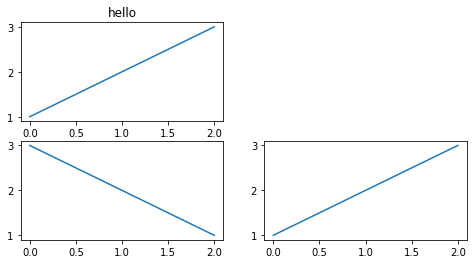

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.title("hello")
plt.plot([1,2,3])
plt.subplot(212)
plt.plot([3,2,1])
plt.subplot(223)
plt.plot([3,2,1])
plt.subplot(224)
plt.plot([1,2,3])